In [142]:
# Loading of the library needed in the EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to visualize data
%matplotlib inline
import seaborn as sns
import squarify
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# Loading of the csv
df = pd.read_csv(r"D:\kunal\others\codes\vscode\Gaming_Industry_India\mobile_game_inapp_purchases.csv")

In [98]:
df.shape

(3024, 12)

In [99]:
# Column name and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         3024 non-null   object 
 1   Age                            2964 non-null   float64
 2   Gender                         2964 non-null   object 
 3   Device                         2964 non-null   object 
 4   GameGenre                      2964 non-null   object 
 5   SessionCount                   3024 non-null   int64  
 6   AverageSessionLength           3024 non-null   float64
 7   SpendingSegment                3024 non-null   object 
 8   InAppPurchaseAmount            2888 non-null   float64
 9   FirstPurchaseDaysAfterInstall  2888 non-null   float64
 10  PaymentMethod                  2888 non-null   object 
 11  LastPurchaseDate               2888 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage:

# Data Cleaning

In [100]:
# To see the  total duplicates in the data set
df.duplicated().sum()

np.int64(0)

In [101]:
# To drop the unrelated column in the data set
df.drop(['UserID', 'SpendingSegment'], axis = 1, inplace = True)

In [102]:
df.head(10)

,Age,Gender,Device,GameGenre,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,49.0,Male,Android,Battle Royale,9,12.83,11.40,28.0,Apple Pay,19-03-2025
1,15.0,Male,iOS,Action RPG,11,19.39,6.37,18.0,Debit Card,08-06-2025
2,23.0,Male,Android,Fighting,9,8.87,15.81,30.0,Apple Pay,02-06-2025
3,31.0,Male,Android,Racing,12,19.56,13.49,9.0,Debit Card,01-04-2025
4,37.0,Female,Android,Battle Royale,10,15.23,10.86,15.0,Paypal,05-05-2025
5,38.0,Female,Android,Fighting,16,25.97,150.51,28.0,Google Pay,05-05-2025
6,20.0,Female,Android,Simulation,9,10.98,608.21,24.0,Debit Card,04-06-2025
7,34.0,Female,iOS,NaN,15,5.06,19.17,30.0,Gift Card,26-04-2025
8,38.0,Male,Android,Action RPG,10,21.82,11.52,1.0,Paypal,08-04-2025
9,46.0,Male,iOS,Battle Royale,18,16.36,7.76,19.0,Google Pay,03-02-2025


In [103]:
# To see the total null values
df.isnull().sum()

Age                               60
Gender                            60
Device                            60
GameGenre                         60
SessionCount                       0
AverageSessionLength               0
InAppPurchaseAmount              136
FirstPurchaseDaysAfterInstall    136
PaymentMethod                    136
LastPurchaseDate                 136
dtype: int64

In [104]:
# To drop all the null values in the data set
df.dropna(inplace = True)


In [105]:
df.isnull().sum()

Age                              0
Gender                           0
Device                           0
GameGenre                        0
SessionCount                     0
AverageSessionLength             0
InAppPurchaseAmount              0
FirstPurchaseDaysAfterInstall    0
PaymentMethod                    0
LastPurchaseDate                 0
dtype: int64

In [106]:
df.shape

(2669, 10)

# Exploratory Data Analysis

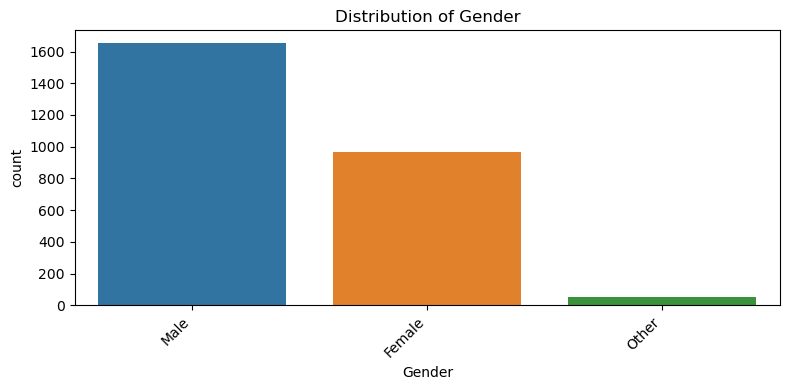

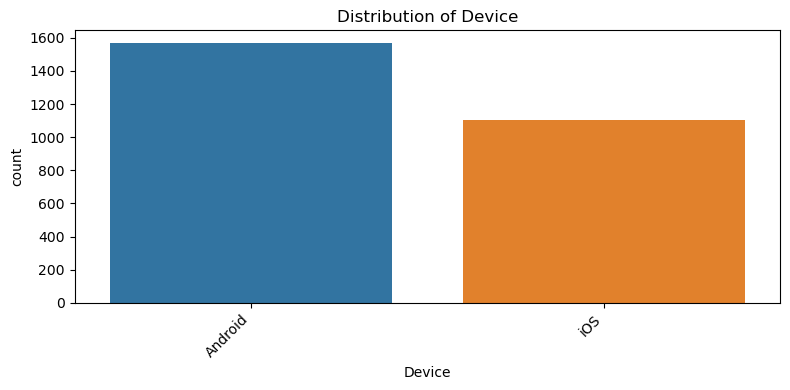

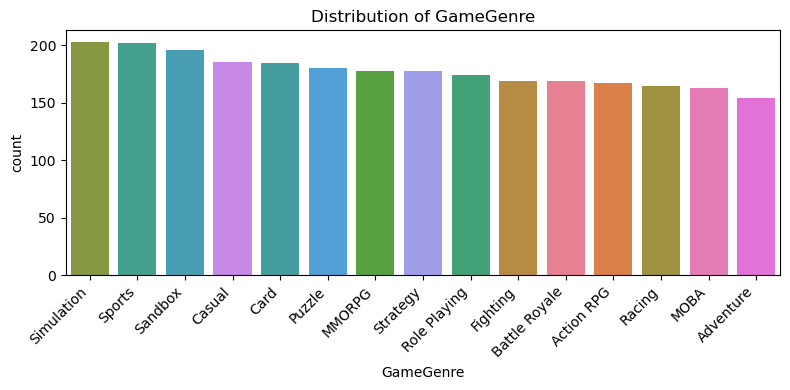

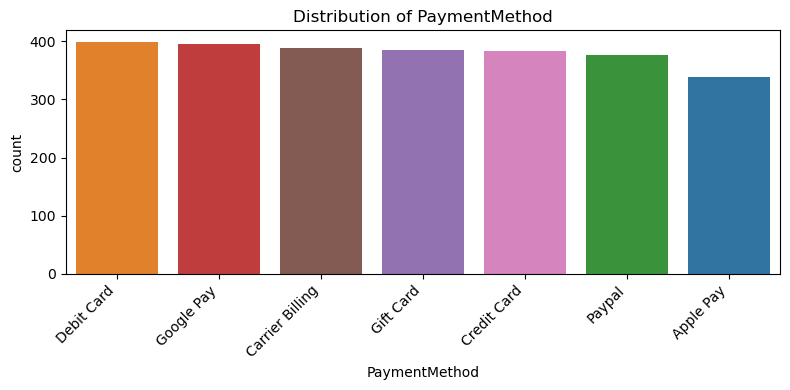

In [124]:
for col in ['Gender', 'Device', 'GameGenre', 'PaymentMethod']:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, hue=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotates labels for readability
    plt.tight_layout()
    plt.show()


## Key Business Insights from User Demographics and Preferences

- **Genre Strategy:** Simulation, Sports, and Sandbox are the most popular game genres, indicating strong user interest and deep engagement. Investing in new features, events, and content for these genres is likely to show high returns.
- **Gender Focus:** The platform's audience is predominantly male, but there is a considerable female gamer presence. To capture a larger market share and foster inclusivity, consider gender-targeted campaigns and inclusive game design.
- **Device Optimization:** Android users form the largest segment, so focusing technical optimization, support, and marketing spend on Android will maximize reach and retention. Maintain strong iOS support to serve higher-spend or premium users.
- **Payment Method Enhancement:** Debit Card and Google Pay are the most used payment methods, with widespread use of other digital payment options. Supporting a range of payment solutions—including local wallets and carrier billing—will reduce checkout friction and increase conversion rates.


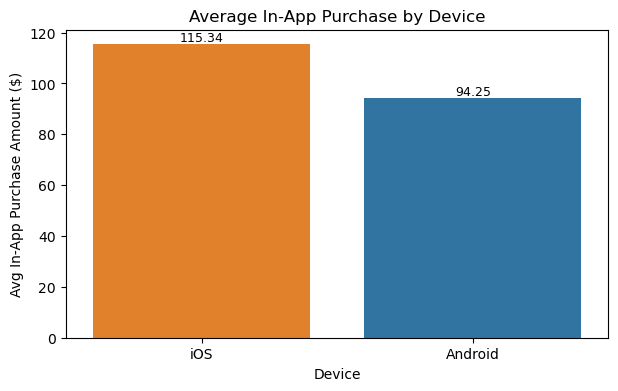

In [122]:
# 1. Distribution of Spending (Identify Market Size & User Value)

# Only for users who made purchases
plot_device = df.groupby('Device')['InAppPurchaseAmount'].mean().reset_index()
plt.figure(figsize=(7,4))
ax = sns.barplot(x='Device', y='InAppPurchaseAmount', data=plot_device, order=plot_device.sort_values('InAppPurchaseAmount', ascending=False)['Device'], hue="Device")
plt.title('Average In-App Purchase by Device')
plt.xlabel('Device')
plt.ylabel('Avg In-App Purchase Amount ($)')

for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.2f}', (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom', fontsize=9)

plt.show()

### Business Insights: Average In-App Purchase Amount by Device

- **Key Finding:**  
  iOS users have a higher average in-app purchase amount ($115.34) compared to Android users ($94.25), even though the total number of Android users is greater.

- **Interpretation:**  
  Although Android dominates in user count, iOS users are more valuable individually, likely representing a premium segment with higher disposable income or stronger engagement with in-app content.

- **Business Recommendation:**  
  - Prioritize monetization features, exclusive in-game items, and targeted promotions for iOS users to maximize revenue per user.
  - Maintain strong support and content for Android due to its large user base, but tailor marketing and VIP engagement programs to attract and retain high-spend iOS users.


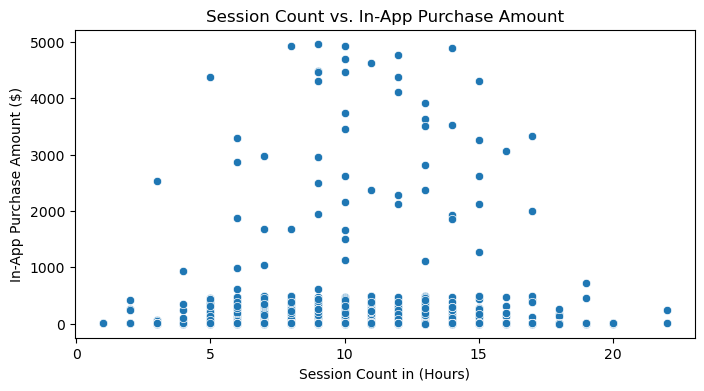

In [ ]:
#  2. User Engagement vs. Spending (Core Revenue Driver)

plt.figure(figsize=(8,4))
sns.scatterplot(x='SessionCount', y='InAppPurchaseAmount', data=df)
plt.title('Session Count vs. In-App Purchase Amount')
plt.xlabel('Session Count in (Hours)')
plt.ylabel('In-App Purchase Amount ($)')
plt.show()


### Business Insights: Engagement vs. In-App Spending

- **Key Finding:**  
  There is high variability in in-app purchase amount for different session counts. While many users with low and moderate session counts spend little, significant purchases also occur across a broad range of gaming session counts. There is not a simple linear relationship between session count and spend.

- **Interpretation:**  
  High engagement (more sessions) does not guarantee high spending, and even lower-engagement users can make large purchases. Peak spending is seen in the mid-to-high range of session counts, but high-value users ("whales") exist at various engagement levels.

- **Business Recommendation:**  
  - Develop targeted incentives like personalized offers or VIP programs for users who, regardless of session count, demonstrate willingness to spend.
  - Use in-game analytics to identify not just the most active, but also the most valuable users—then segment and craft retention strategies accordingly.
  - Test time-limited offers at different engagement milestones to maximize conversion of both moderately and highly-engaged segments.


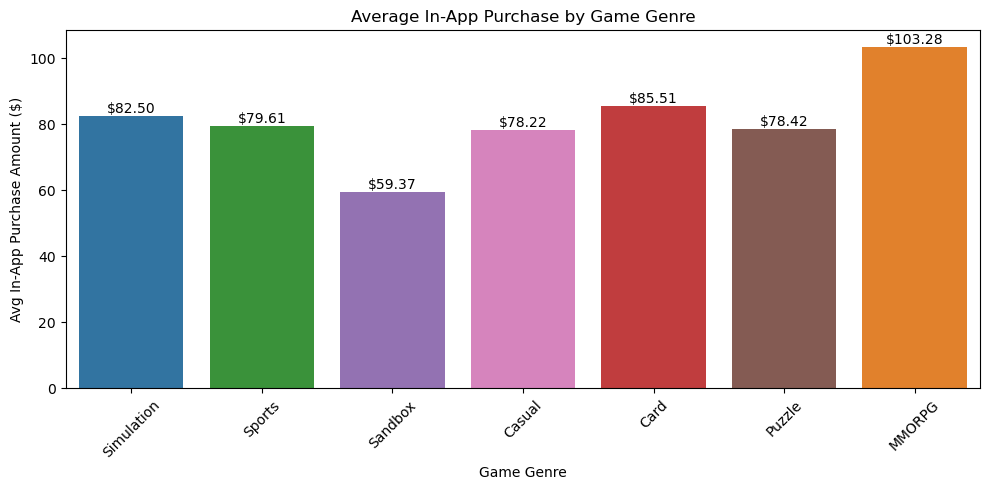

In [121]:
#  3. Top Performing Game Genres (Guide Game Launch Strategy)

top_genres = df['GameGenre'].value_counts().nlargest(7).index
plot_data = df[df['GameGenre'].isin(top_genres)]

plt.figure(figsize=(10,5))
ax = sns.barplot(
    x='GameGenre',
    y='InAppPurchaseAmount',
    data=plot_data,
    estimator=np.mean,
    errorbar=None,  # Remove error bars
    order=top_genres,
    hue="GameGenre"
)
plt.title('Average In-App Purchase by Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Avg In-App Purchase Amount ($)')
plt.xticks(rotation=45)

# Add numeric value on top of each bar
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'${value:.2f}', (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



### Business Insights: Top Performing Game Genres

- **Key Finding:**  
  MMORPG (Massively Multiplayer Online Role-Playing Games) has the highest average in-app purchase amount ($103.28), outperforming all other top genres. Simulation, Card, and Sports genres also show strong monetization, while Sandbox games have the lowest average.

- **Interpretation:**  
  Genres differ greatly in their revenue potential. MMORPG and Card games attract users who tend to spend significantly more, suggesting specialized game mechanics or in-game economies that drive purchases. Genres like Sandbox and Casual, despite high player counts, generate lower average spend per user.

- **Business Recommendation:**  
  - Focus new game launches, premium content drops, and marketing budget on genres with the highest ARPPU (average revenue per paying user), such as MMORPG, Card, and Simulation.
  - Optimize monetization features (e.g., exclusive items, events, or tiered subscriptions) for MMORPG and Card games to maximize revenue from high-value spenders.
  - Analyze engagement and retention strategies in top-earning genres and adopt best practices in lower-earning but popular genres to raise overall monetization rates.


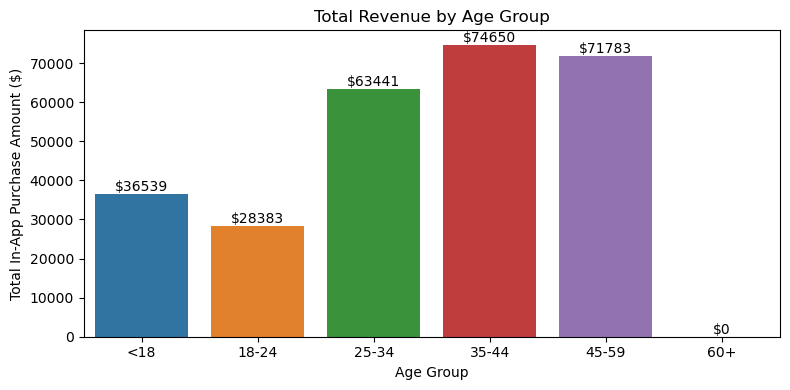

In [120]:
# 4. Total Revenue Contribution by Age Group (Target Demographic)

age_bins = [10, 18, 25, 35, 45, 60, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_revenue = df.groupby('AgeGroup', observed=False)['InAppPurchaseAmount'].sum().reset_index()

plt.figure(figsize=(8,4))
ax = sns.barplot(x='AgeGroup', y='InAppPurchaseAmount', data=age_revenue, hue="AgeGroup")
plt.title('Total Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total In-App Purchase Amount ($)')

for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'${value:.0f}', (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


### Business Insights: Revenue Contribution by Age Group

- **Key Finding:**  
  The 35–44 and 45–59 age groups generate the highest total in-app purchase revenue, followed by the 25–34 segment. The 18–24 and under-18 segments contribute substantially less, and there is virtually no revenue from the 60+ group.

- **Interpretation:**  
  Users aged 35–59 are the most valuable demographic for in-app monetization. Younger users (<25) represent a large user segment, but monetization per user is lower. The 60+ segment is not a significant revenue driver.

- **Business Recommendation:**  
  - Focus retention, loyalty, and premium content campaigns on the 35–59 age segments to maximize high-value engagement and lifetime value.
  - Invest in market research to understand the needs and barriers for younger segments (<25) and test features or price models that may improve their conversion.
  - Allocate less marketing or development spend toward the 60+ group, as they currently show minimal ROI.


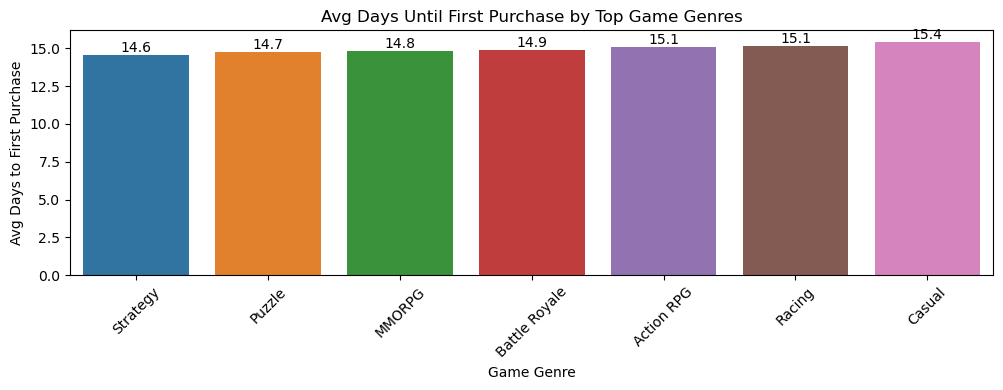

In [ ]:
# 5. Average Time to First Purchase by Game Genre

# Calculate average time to first purchase by genre
genre_first_purchase = df.groupby('GameGenre', observed=False)['FirstPurchaseDaysAfterInstall'].mean().reset_index()
top_genres_fp = genre_first_purchase.sort_values('FirstPurchaseDaysAfterInstall').head(7)

plt.figure(figsize=(10,4))
ax = sns.barplot(
    x='GameGenre',
    y='FirstPurchaseDaysAfterInstall',
    data=top_genres_fp,
    hue = "GameGenre"
)
plt.title('Avg Days Until First Purchase by Top Game Genres')
plt.xlabel('Game Genre')
plt.ylabel('Avg Days to First Purchase')
plt.xticks(rotation=45)

# Annotate value on each bar
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.1f}', (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Business Insights: Time to First Purchase by Game Genre

- **Key Finding:**  
  Across top game genres, users typically make their first purchase between 14.6 and 15.4 days after installation. Strategy, Puzzle, and MMORPG genres see purchases made slightly earlier, while Casual genres take the longest.

- **Interpretation:**  
  Most paying users convert within two weeks of playing, suggesting that the first 15 days are a critical window for monetization efforts, especially in genres like Strategy and Puzzle where users show the fastest conversion.

- **Business Recommendation:**  
  - Intensify onboarding, targeted promotions, and special purchase offers during the first two weeks especially for players in genres with the fastest conversion (Strategy, Puzzle, MMORPG).
  - Test incentive timing for genres with longer conversion lags (e.g., Casual, Racing) to encourage earlier purchases, potentially boosting lifetime value.
  - Use in-game analytics to further personalize early-game experience and messages based on genre, enhancing early monetization.


# Regression

### A natural target is InAppPurchaseAmount (predicting user spending based on features like Age, Gender, Device, GameGenre, SessionCount, AverageSessionLength, etc.).

In [149]:
# Preparing The Data
import pandas as pd

import pandas as pd

# Drop LastPurchaseDate (not useful for regression)
df_reg = df.drop(['LastPurchaseDate'], axis=1)

# One-hot encode all categorical columns except the target
categorical_cols = ['Gender', 'Device', 'GameGenre', 'PaymentMethod', 'AgeGroup']
df_reg = pd.get_dummies(df_reg, columns=categorical_cols, drop_first=True)

# Define X and y
X = df_reg.drop(['InAppPurchaseAmount'], axis=1)
y = df_reg['InAppPurchaseAmount']


In [151]:
#  Split Data Into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [152]:
# Fit the Regression Mode
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [153]:
# Evaluate Model Performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 179758.94
R^2 Score: -0.01


In [154]:
# Interpret Feature Influence

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df.sort_values(by='Coefficient', ascending=False))

                          Feature  Coefficient
30                 AgeGroup_45-59   117.780294
8         GameGenre_Battle Royale   112.369763
20             GameGenre_Strategy   111.307443
15               GameGenre_Racing    99.164270
29                 AgeGroup_35-44    84.520122
13                 GameGenre_MOBA    72.280367
12               GameGenre_MMORPG    56.094794
7             GameGenre_Adventure    55.087839
23       PaymentMethod_Debit Card    54.497249
9                  GameGenre_Card    43.755071
4                     Gender_Male    37.563370
11             GameGenre_Fighting    30.604308
16         GameGenre_Role Playing    29.496163
21  PaymentMethod_Carrier Billing    28.442882
14               GameGenre_Puzzle    28.231711
18           GameGenre_Simulation    28.195655
26           PaymentMethod_Paypal    22.160830
28                 AgeGroup_25-34    17.268856
25       PaymentMethod_Google Pay    12.453259
6                      Device_iOS    11.633999
22      Payme

### Business Insights: Key Predictors of In-App Purchase Revenue

- **Top Drivers:**  
  Age group 45–59 (+$118), followed by Battle Royale (+$112), Strategy (+$111), and Racing (+$99) game genres are the strongest predictors of higher user spending. Age group 35–44 and genres like MOBA and MMORPG are also significant positive factors.

- **Payment and Platform:**  
  Users paying with Debit Card or Carrier Billing spend more on average, and iOS device users show higher spending compared to Android.

- **Additional Observations:**  
  - Gender_Male is slightly positively associated with higher spend.
  - Younger users (AgeGroup 18–24), “Other” genders, and increases in user age (as a raw variable) have negative or minimal association with spending.

- **Actionable Recommendations:**  
  - Focus acquisition, premium offers, and engagement strategies on users aged 35–59, especially those who play top-spending genres.
  - Enhance and market high-value items or subscriptions for users in Battle Royale, Strategy, Racing, MOBA, and MMORPG genres.
  - Promote and simplify Debit Card and Carrier Billing payments, and consider iOS-specific content or VIP programs to maximize revenue.
  - Segment and test new incentives for underperforming groups (e.g., 18–24 age, other genders) to increase overall conversion.

---


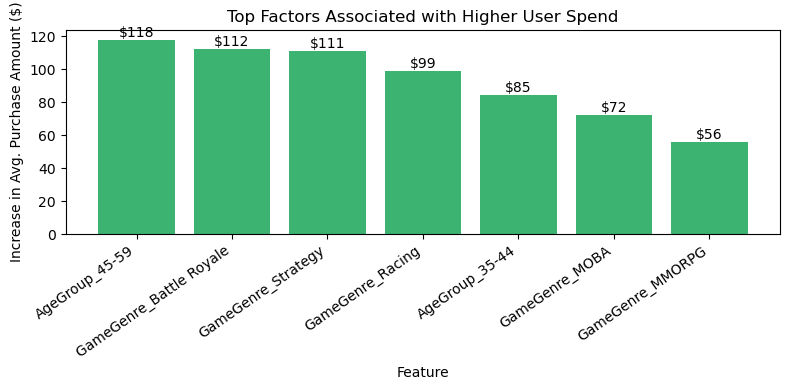

In [155]:

# Take the top 7 features with highest positive coefficients (excluding encoded technical names if needed)
top_coef = coef_df.sort_values(by='Coefficient', ascending=False).head(7)

plt.figure(figsize=(8, 4))
bars = plt.bar(top_coef['Feature'], top_coef['Coefficient'], color='mediumseagreen')
plt.title('Top Factors Associated with Higher User Spend')
plt.ylabel('Increase in Avg. Purchase Amount ($)')
plt.xlabel('Feature')
plt.xticks(rotation=35, ha='right')

# Annotate each bar with value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${yval:.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Business Insights: Key Drivers of In-App Purchase Revenue

- **Key Finding:**  
  The regression model identifies age group 45–59, followed by game genres like Battle Royale, Strategy, and Racing, as the strongest positive predictors of higher user spending. Other influential factors include age 35–44, MOBA, and MMORPG genres.

- **Interpretation:**  
  Users aged 35–59, and those engaging with specific high-monetization game genres, are the **most valuable segments** for in-app purchase revenue. Game type and user demographics together have substantial impact on spending behavior.

- **Business Recommendation:**  
  - Target marketing and premium in-game content toward users aged 35–59, focusing especially on genres such as Battle Royale, Strategy, Racing, MOBA, and MMORPG.
  - Develop engagement strategies and personalized offers for these high-value segments to further increase average revenue per paying user (ARPPU).
  - Use these findings to guide resource allocation for feature improvements, user acquisition campaigns, and game development priorities.


## Conclusion

This project provided a comprehensive end-to-end analysis of user-level gaming data to uncover the critical drivers and patterns behind in-app purchase revenue. By leveraging advanced exploratory data analysis, visualization, and linear regression modeling, the study identified clear business opportunities and strategic actions for gaming companies.

Key findings include:
- **Demographic Impact:** Users aged 35–59 are the highest contributors to total revenue, demonstrating that mature player segments hold the greatest monetization potential, while younger and 60+ groups contribute less.
- **Genre Influence:** Game genres such as Battle Royale, MMORPG, Strategy, and Racing are strongly associated with increased user spend. Focused investment in these areas is likely to yield the greatest financial impact.
- **Platform Insights:** Although Android holds a larger share of the user base, iOS users have a considerably higher average purchase value, highlighting the importance of premium offerings and targeted marketing for iOS players.
- **User Journey & Timing:** Analysis showed that most first-time purchases are made within two weeks of joining. This indicates a critical window for onboarding, personalized offers, and early-game monetization strategies to maximize conversion.
- **Behavioral Drivers:** High session counts alone do not guarantee high spend, revealing the importance of understanding player motivations and combining behavioral segmentation with targeted campaign strategies.
- **Payment Preferences:** A wide range of payment methods is utilized, underlining the need for continued investment in seamless, frictionless payment flows within games.

Overall, this analysis empowers game studios, marketers, and product managers with data-driven insights to optimize user acquisition, retention, and revenue. By aligning product features and campaigns with high-value segments and optimizing the timing and nature of offers, companies can drive sustainable growth and increased player lifetime value.

